In [2]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
# Read in data
df = pd.read_csv("sample_files.txt")
samples = list(df.columns)[2:]

In [3]:
# Convert to numpy
df_np = df.to_numpy()

In [4]:
df_np

array([['40602', 'NM_022746', 4.651057038, ..., 78.19973746, 58.87104065,
        37.84662205],
       ['40602', 'NM_001166373', 0.046364124, ..., 0.006682902,
        0.07680538, 0.096229282],
       ['40602', 'NM_017923', 0.692316448, ..., 0.051989415, 0.081680706,
        0.572872297],
       ...,
       ['ZYX', 'NM_001010972', 0.921825664, ..., 0.244590099,
        5.691434193, 8.371209787],
       ['ZZEF1', 'NM_015113', 2.52718634, ..., 3.036931093, 1.754051203,
        1.600555083],
       ['ZZZ3', 'NM_015534', 6.882699345, ..., 17.08088491, 6.192578213,
        4.670515411]], dtype=object)

In [5]:
# Isolate scRNA data of samples
data = df_np[:,2:] 

# Determine median gene expression for each sample
med = np.median(data, axis = 1).reshape(-1,1) 

In [6]:
# Data - median
scaled_data = data - med

# Compute median (absolute deviation) for each gene.
mad = np.median(np.abs(scaled_data),axis = 1).reshape(-1,1)

In [7]:
# Consider where median (absolute deviation) is non-zero, and extract those rows.
valid_rows = np.where(mad != 0)[0]
mad2 = mad[valid_rows]
data2 = scaled_data[valid_rows,:]
# This is the new data file we should use.
d2 = data[valid_rows,:]

In [8]:
d2 = d2[np.where(abs_norm_data >= 20)[0]]

NameError: name 'abs_norm_data' is not defined

In [9]:
d2[855]

array([2.267798931, 2.24128251, 2.945279924, 14.7201671, 29.85259381,
       23.36560016, 25.75858081, 17.65214073, 13.77708375], dtype=object)

In [11]:
norm_data = data2/mad2

In [12]:
norm_data = np.where(abs_norm_data >= 20,norm_data,0)

NameError: name 'abs_norm_data' is not defined

In [13]:
n2 = norm_data[inds,:]

NameError: name 'inds' is not defined

In [14]:
abs_norm_data = np.abs(norm_data)
filtered_data = np.where(abs_norm_data >= 20,1,0) # If there is an outlier in a certain position, set it equal to 1. Else, 0.

In [15]:
summed = np.sum(filtered_data,axis = 1)
inds = np.where(summed != 0)[0]

filtered_data = filtered_data[inds,:] # Get genes such that at least one sample has an outlier.

<BarContainer object of 9 artists>

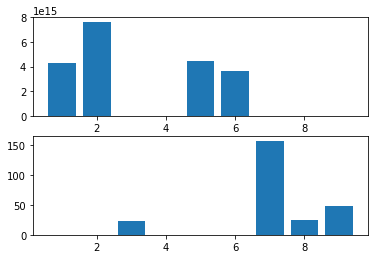

In [320]:
# Make a bar plot
fig, ax = plt.subplots(2,1)
ax[0].bar(x = np.arange(1,len(n2[855])+1,1), height = n2[855] )
ax[1].bar(x = np.arange(1,len(n2[855])+1,1), height = n2[30] )

Text(0,0.5,'Gene 855')

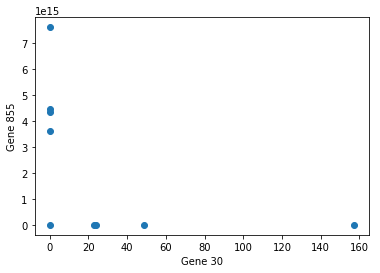

In [327]:
# Make a scatter plot
plt.scatter(x = n2[30],y = n2[855] )
plt.xlabel("Gene 30")
plt.ylabel("Gene 855")

In [357]:
import seaborn as sns
db = pd.DataFrame(n2.transpose(),dtype = float)

In [241]:
filtered_data.shape

(7998, 9)

In [ ]:
arr_list = {}

for ind1 in range(filtered_data.shape[0]):
    if ind1%1000 == 0:
        print(ind1)
    for ind2 in range(ind1+1,filtered_data.shape[0]):
        
        #if ind1 < ind2: # If distinct genes
            
        gene1, gene2 = filtered_data[ind1],filtered_data[ind2] # Get the corresponding genes.
            
        diff_exp = np.abs(gene1 - gene2) # Do gene1 - gene2
        num_diff = np.sum(diff_exp) 
        
        num_sim = num_diff
            
        if num_diff in arr_list.keys():
                
            arr_list[num_diff].append([ind1,ind2])
            
        else:
            arr_list[num_diff] = [[ind1,ind2]]

0
1000
2000
3000
4000
5000
6000


In [370]:
num_samples = 9

co_expr_dict = {(num_samples - i):arr_list[i] for i in sorted(arr_list.keys())}

In [384]:
import networkx as nx

edge_list_9 = co_expr_dict[9][:1000]

G = nx.Graph()

G.add_nodes_from(list(i for i in range(filtered_data.shape[0])))

G.add_edges_from(edge_list_9)

In [385]:
len(edge_list_9)

1000

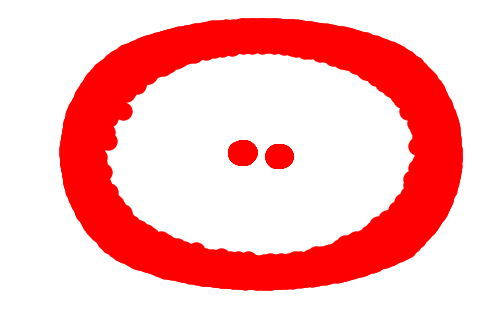

In [386]:
nx.draw(G)

In [268]:
filtered_data[30], filtered_data[855]
orig_data = np.where(abs_norm_data >= 20,abs_norm_data,0)[inds,:]

ind1 = 30
ind2 = 855

data1 = orig_data[ind1]
data2 = orig_data[ind2]

data1,data2

(array([0, 0, 22.95582294255686, 0, 0, 0, 157.33729735271643,
        24.05261078402205, 48.7283151373024], dtype=object),
 array([4324291055395999.0, 7596609226629406.0, 0, 0, 4447305881135345.0,
        3617306722036792.0, 0, 0, 0], dtype=object))

In [265]:
filtered_data[30], filtered_data[855]

(array([0, 0, 1, 0, 0, 0, 1, 1, 1]), array([1, 1, 0, 0, 1, 1, 0, 0, 0]))

In [256]:
max_arr = arr_list[max(arr_list.keys())]

1

In [259]:
arr_list[max(arr_list.keys())]

[[30, 855],
 [30, 941],
 [30, 942],
 [30, 1180],
 [30, 2060],
 [30, 3080],
 [30, 3081],
 [30, 3082],
 [30, 3501],
 [30, 3723],
 [30, 4341],
 [30, 6879],
 [30, 6880],
 [30, 7017],
 [30, 7018],
 [30, 7020],
 [30, 7021],
 [30, 7285],
 [47, 70],
 [47, 210],
 [47, 295],
 [47, 413],
 [47, 414],
 [47, 949],
 [47, 979],
 [47, 985],
 [47, 988],
 [47, 1129],
 [47, 1132],
 [47, 1181],
 [47, 1184],
 [47, 1354],
 [47, 1415],
 [47, 1446],
 [47, 1582],
 [47, 1902],
 [47, 1916],
 [47, 1966],
 [47, 2057],
 [47, 2156],
 [47, 2300],
 [47, 2464],
 [47, 2470],
 [47, 2534],
 [47, 2535],
 [47, 2657],
 [47, 2658],
 [47, 2740],
 [47, 2893],
 [47, 2896],
 [47, 2966],
 [47, 3730],
 [47, 3731],
 [47, 3732],
 [47, 3733],
 [47, 3778],
 [47, 3815],
 [47, 3936],
 [47, 3938],
 [47, 3965],
 [47, 4078],
 [47, 4594],
 [47, 4662],
 [47, 5037],
 [47, 5092],
 [47, 5219],
 [47, 5600],
 [47, 5601],
 [47, 5622],
 [47, 5712],
 [47, 5773],
 [47, 5775],
 [47, 5926],
 [47, 6486],
 [47, 6870],
 [47, 6908],
 [47, 6934],
 [47, 7127],

In [249]:
len(arr_list[max(arr_list.keys())])

28917

In [152]:
np.where(abs_norm_data >= 5)

(array([    2,     2,     2, ..., 37246, 37248, 37253]),
 array([0, 1, 2, ..., 6, 6, 6]))

Let's say, first 4 are normal samples, and last 4 are tumor samples

Example Calculation below

In [93]:
arr1 = np.concatenate([np.arange(40,55),np.array([1,2,3,80,82,88]) ])

In [94]:
med = np.median(arr1) # Calculate medians
arr2 = arr1-med
arr2

array([ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,
         4.,   5.,   6.,   7., -46., -45., -44.,  33.,  35.,  41.])

In [88]:
abs(arr2/median(abs(arr2)))

array([  1.125,   0.875,   0.625,   0.375,   0.125,   0.125,   0.375,
         0.625,   0.875,   1.125,  10.875,  10.625,  10.375,   8.875,
         9.375,  10.875])

In [87]:
std(arr1)
mean(arr1)

43.8125